In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
# Basic information of the dataframe
print("Shape of dataframe : ")
print(data.shape)
print() 

print("Data types of each column in the dataframe: ")
print(data.dtypes)
print()

Shape of dataframe : 
(5572, 5)

Data types of each column in the dataframe: 
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object



In [5]:
print("Invoking the info() method on the dataframe:")
print(data.info())
print()

print("Invoking the describe() method on the dataframe:")
print(data.describe())
print()

Invoking the info() method on the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None

Invoking the describe() method on the dataframe:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                       

In [6]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

In [8]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Step 1 -  Preprocessing: Convert labels to binary (0 for ham, 1 for spam)

In [9]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'spam' else 0)

In [10]:
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2 -  Feature extraction using TF-IDF

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Step 3 -  Train the Logistic Regression model

In [12]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression()

Step 4 -  Test the model

In [13]:
y_train_pred = lr.predict(X_train_tfidf)
y_test_pred = lr.predict(X_test_tfidf)

Step 5 -  Calculate and print accuracies

In [14]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [15]:
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9773390172761948
Testing Accuracy: 0.967713004484305


In [16]:
report_training = classification_report(y_train, y_train_pred)
report_testing = classification_report(y_test, y_test_pred)

In [17]:
print("\nTraining Classification Report : \n", report_training)
print()
print("\nTesting Classification Report : \n", report_testing)


Training Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3860
           1       1.00      0.83      0.91       597

    accuracy                           0.98      4457
   macro avg       0.99      0.92      0.95      4457
weighted avg       0.98      0.98      0.98      4457



Testing Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Step 6 - Calculate and print confusion matrix for test set

In [19]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):\n", cm_test)


Confusion Matrix (Test Set):
 [[964   1]
 [ 35 115]]


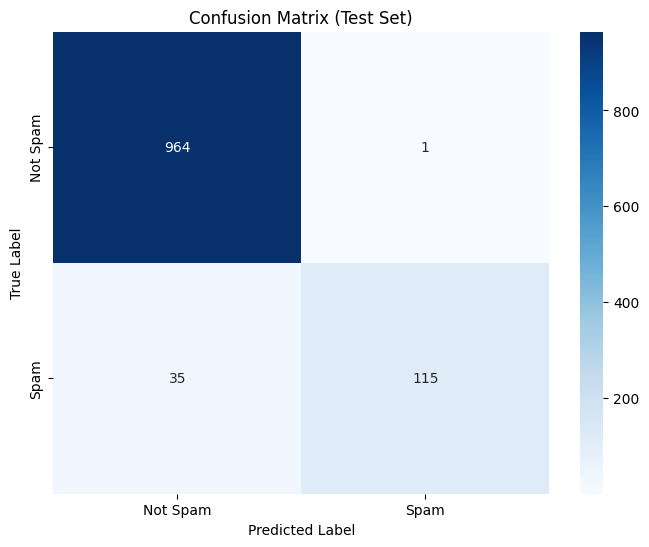

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

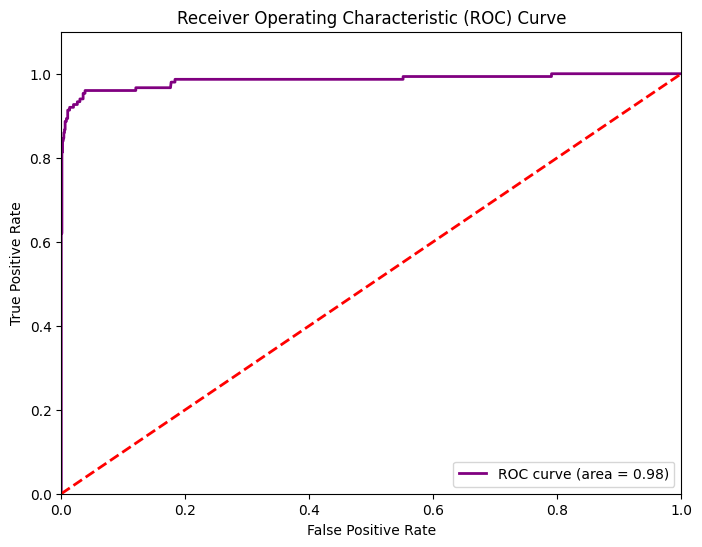

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()